In [1]:
from IPython.display import clear_output
import seaborn as sn
import sys
import numpy as np
from numpy import array
import pandas as pd 
import matplotlib.pyplot as plt 
from math import exp
%matplotlib inline

In [2]:
df=pd.read_csv("wdbc.dataset")# reading the data

In [3]:
df=df.drop(df.columns[0], axis=1)# dropping the id column 

In [4]:
df=df.replace('M', 1)#Replacing M by 1
df=df.replace('B', 0)#Replacing B by 1

In [5]:
x_data = df.drop(df.columns[0], axis = 1) #Separating x 
y = df.M.values#                            and y values

In [6]:
y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,

In [7]:
x = (x_data - np.min(x_data))/(np.max(x_data) - np.min(x_data)).values #Normalization

In [8]:
#Splitting data into train,test and validation
from sklearn.model_selection import train_test_split 
x_train, x_test, y_train, y_test = train_test_split( 
    x, y, test_size = 0.20, random_state = 42) 

x_validation, x_test, y_validation, y_test = train_test_split( 
    x_test, y_test, test_size = 0.5, random_state = 42) 

#transforming matrices
x_train = x_train.T 
x_test = x_test.T 
x_validation = x_validation.T 
y_train = y_train.T 
y_test = y_test.T 
y_validation = y_validation.T 
  
print("x train: ", x_train.shape) 
print("x test: ", x_test.shape) 
print("x validation: ", x_validation.shape) 
print("y train: ", y_train.shape) 
print("y test: ", y_test.shape) 
print("y validation: ", y_validation.shape)

x train:  (30, 454)
x test:  (30, 57)
x validation:  (30, 57)
y train:  (454,)
y test:  (57,)
y validation:  (57,)


In [9]:
#Intializing weights and biases to zeros
def initialize_weights_and_bias(dimension): 
    w = np.full((dimension, 1), 0.01) 
    b = 0.0
    return w, b 

In [10]:
#Sigmoid Activation function
def sigmoid(z): 
    y_head = 1/(1 + np.exp(-z)) 
    return y_head 

In [11]:
# Forward and backward(Gradient finding) propagation
def forward_backward_propagation(w, b, x_train, y_train): 
    z = np.dot(w.T, x_train) + b 
    y_head = sigmoid(z) 
    loss = - y_train * np.log(y_head) - (1 - y_train) * np.log(1 - y_head) 
    # x_train.shape[1]  is for scaling 
    cost = (np.sum(loss)) / x_train.shape[1]       
  
    # Gradient 
    derivative_weight = (np.dot(x_train, ( 
        (y_head - y_train).T))) / x_train.shape[1]  
    derivative_bias = np.sum( 
        y_head-y_train) / x_train.shape[1]                  
    gradients = {"derivative_weight": derivative_weight, 
                 "derivative_bias": derivative_bias} 
    return cost, gradients 

In [12]:
#Calculating validation loss
def validation(w, b, x_validation, y_validation):
    z = np.dot(w.T, x_validation) + b
    y_head = sigmoid(z)
    loss = - y_validation * np.log(y_head) - (1 - y_validation) * np.log(1 - y_head)
    cost = (np.sum(loss)) / x_validation.shape[1]  
    return cost

In [13]:
#updation of weight
def update(w, b, x_train, y_train, x_validation, y_validation,learning_rate, number_of_iterarion): 
    cost_list = [] 
    cost_list2 = [] 
    loss2_list=[]
    index = [] 
  
    for i in range(number_of_iterarion): 
        cost, gradients = forward_backward_propagation(w, b, x_train, y_train) 
        cost_list.append(cost) 
  
        # Updation of weights
        w = w - learning_rate * gradients["derivative_weight"] 
        b = b - learning_rate * gradients["derivative_bias"] 
        loss2=validation(w, b, x_validation, y_validation)
        loss2_list.append(loss2)
        
        print ("Cost after iteration % i: % f" %(i, cost)) 
        if i % 10 == 0: 
            cost_list2.append(cost) 
            index.append(i) 
            
  
    parameters = {"weight": w, "bias": b} 
    plt.plot(cost_list,label="training loss") 
    plt.plot(loss2_list,label="Validation loss") 
    plt.legend(loc='upper right')
    #plt.xticks(index, rotation ='vertical') 
    #plt.xlabel("Number of Iterarion") 
    plt.ylabel("Cost") 
    plt.show()
    #clear_output(wait=True)
    return parameters, gradients, cost_list 

In [14]:
#predcition of model
def predict(w, b, x_test): 
    z = sigmoid(np.dot(w.T, x_test)+b) 
    Y_prediction = np.zeros((1, x_test.shape[1])) 
  
    # if z is bigger than 0.5,then y_head = 1, 
    # if z is smaller than 0.5, then y_head = 0 
    for i in range(z.shape[1]): 
        if z[0, i]<= 0.5: 
            Y_prediction[0, i] = 0
        else: 
            Y_prediction[0, i] = 1
  
    return Y_prediction 

Cost after iteration  0:  0.693456
Cost after iteration  1:  0.664959
Cost after iteration  2:  0.643057
Cost after iteration  3:  0.623256
Cost after iteration  4:  0.604844
Cost after iteration  5:  0.587639
Cost after iteration  6:  0.571536
Cost after iteration  7:  0.556449
Cost after iteration  8:  0.542298
Cost after iteration  9:  0.529009
Cost after iteration  10:  0.516512
Cost after iteration  11:  0.504747
Cost after iteration  12:  0.493655
Cost after iteration  13:  0.483184
Cost after iteration  14:  0.473286
Cost after iteration  15:  0.463917
Cost after iteration  16:  0.455038
Cost after iteration  17:  0.446613
Cost after iteration  18:  0.438609
Cost after iteration  19:  0.430995
Cost after iteration  20:  0.423744
Cost after iteration  21:  0.416830
Cost after iteration  22:  0.410232
Cost after iteration  23:  0.403927
Cost after iteration  24:  0.397897
Cost after iteration  25:  0.392124
Cost after iteration  26:  0.386591
Cost after iteration  27:  0.381284
Co

Cost after iteration  651:  0.107861
Cost after iteration  652:  0.107798
Cost after iteration  653:  0.107735
Cost after iteration  654:  0.107673
Cost after iteration  655:  0.107610
Cost after iteration  656:  0.107548
Cost after iteration  657:  0.107486
Cost after iteration  658:  0.107424
Cost after iteration  659:  0.107362
Cost after iteration  660:  0.107300
Cost after iteration  661:  0.107238
Cost after iteration  662:  0.107177
Cost after iteration  663:  0.107115
Cost after iteration  664:  0.107054
Cost after iteration  665:  0.106993
Cost after iteration  666:  0.106932
Cost after iteration  667:  0.106871
Cost after iteration  668:  0.106810
Cost after iteration  669:  0.106750
Cost after iteration  670:  0.106689
Cost after iteration  671:  0.106629
Cost after iteration  672:  0.106569
Cost after iteration  673:  0.106509
Cost after iteration  674:  0.106449
Cost after iteration  675:  0.106389
Cost after iteration  676:  0.106329
Cost after iteration  677:  0.106270
C

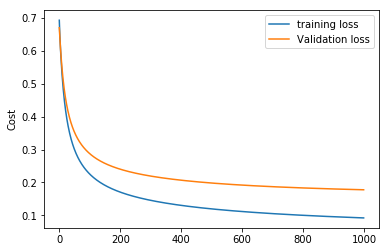

Accuracy =  0.9298245614035088
Precision =  0.9523809523809523
Recall =  0.8695652173913043
F1 Score = 0.909090909090909


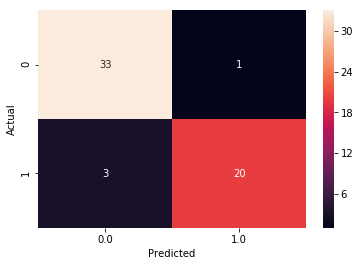

In [15]:
#Main calling function and plotting graphs and confusion matrix, finding out accuracy metrics
def logistic_regression(x_train, y_train, x_test, y_test,x_validation, y_validation, 
                        learning_rate,num_iterations): 
  
    dimension = x_train.shape[0] 
    w, b = initialize_weights_and_bias(dimension) 
      
    parameters, gradients, cost_list = update( 
        w, b, x_train, y_train, x_validation, y_validation, learning_rate, num_iterations) 
      
    y_prediction_test = predict( 
        parameters["weight"], parameters["bias"], x_test) 
    y_prediction_train = predict( 
        parameters["weight"], parameters["bias"], x_train) 
  
    # train / test Errors 
    
    
#     print(y_prediction_test.shape)
#     print(y_test.shape)
    y_test=y_test.T
    y_predictions_test12=y_prediction_test.reshape(57)
    y_test=y_test.reshape(57)
    predictions=y_predictions_test12.tolist()
    y_test_list=y_test.tolist()
    
    TP=0
    TN=0
    FP=0
    FN=0
    
    
    for i in range(len(y_test_list)):
        #print(y_test_list[i]," = ",predictions[i])
        if(y_test_list[i]==1):
            if(predictions[i]==1):
                TP=TP+1
            else:
                FN=FN+1
        elif(y_test_list[i]==0):
            if(predictions[i]==0):
                TN=TN+1
            else:
                FP=FP+1
                
    Accuracy=(TP+TN)/(TP+TN+FP+FN)

    Precision=(TP)/(TP+FP)

    Recall=(TP)/(TP+FN)
    
    F1=(2*Precision*Recall)/(Precision+Recall)
        
    print("Accuracy = ",Accuracy)
        
    print("Precision = ",Precision)
        
    print("Recall = ",Recall)
    
    print("F1 Score =", F1)
        
    
    
    new_data = {'y_Predicted': predictions,
        'y_Actual':    y_test_list
        }

    df_new = pd.DataFrame(new_data, columns=['y_Actual','y_Predicted'])
    confusion_matrix = pd.crosstab(df_new['y_Actual'], df_new['y_Predicted'], rownames=['Actual'], colnames=['Predicted'])

    sn.heatmap(confusion_matrix, annot=True)
    
      
logistic_regression(x_train, y_train, x_test,y_test, x_validation, y_validation, learning_rate = 0.8, num_iterations = 1000) 
plt.show()